In [2]:
from StochasticForceInference import *
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [3]:
data_raw = loadmat("fit_result_dur_27052020_n_r_fix_0p0513_wav_532_r_1p516_n_1.597.mat")["data"][:,:3]

In [4]:
data = data_raw * 0.0153 * 1e-6
data[:,2] = data[:,2] - np.min(data[:,2]) 

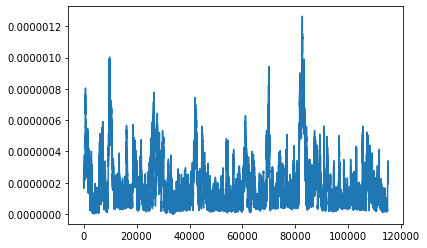

In [5]:
plt.plot(data[:,2])

In [6]:
xlist = np.ones((len(data),1,3))
xlist[:,0,:] = data 
tlist = np.arange(len(xlist)) / 60

data = StochasticTrajectoryData(xlist,tlist)  

In [7]:
S = StochasticForceInference(data)  

S.compute_drift(#basis = { 'type' : 'pade', 'order' : 2} ,
                basis = { 'type' : 'polynomial', 'order' : 4} ,
                #basis = { 'type' : 'Fourier', 'order' : 4, 'center' : 0, 'width' : 400e-9, } ,
                #basis = { 'type' : 'Fourier', 'order' : 4, 'center' : center, 'width' : width, } ,
                #diffusion_mode = 'WeakNoise',  # Best for space-dependent noise with large dt
                #diffusion_mode = 'MSD',        # Best for space-dependent noise with short trajectories
                #diffusion_mode = 'constant',   
                diffusion_mode = 'Vestergaard', # Best for space-dependent noise with large measurement error 
                #mode='Ito'
                mode='Stratonovich'
) 


S.compute_diffusion(
    method='Vestergaard',
    #method='MSD',
    #method='WeakNoise',
    basis = { 'type' : 'polynomial', 'order' :4}
    #basis = { 'type' : 'pade', 'order' :2}
) 

S.compute_force()
S.compute_drift_error() 
S.compute_diffusion_error()
S.compute_entropy()

S.print_report()

             
  --- StochasticForceInference report --- 
Average diffusion tensor:
 [[ 6.88090934e-15 -2.95861992e-16 -1.56042856e-17]
 [-2.95861992e-16  6.85335761e-15  3.73458610e-17]
 [-1.56042856e-17  3.73458610e-17  3.05953804e-15]]
Entropy production: inferred/bootstrapped error 158.87445229917432 210.75518713568675
Drift information: inferred/bootstrapped error 178043.73540581408 599.0356590484645
Drift: squared typical error on projections: 7.84183665754942
  - due to trajectory length: 0.0002948713689944611
  - due to discretization: 7.841541786180426
Diffusion: squared typical error on projections: 38.363529323014916
  - due to trajectory length: 0.010956712290648533
  - due to discretization: 0.00014996897802797957
  - due to drift: 38.35242264174624


In [8]:
field=S.F_ansatz
#field=S.phi_ansatz
field2=S.D_ansatz;
dataT=S.data


dir1 = np.zeros(dataT.d);dir1[0] = 1
dir2 = np.zeros(dataT.d);dir2[1] = 1
dir3 = np.zeros(dataT.d);dir3[2] = 1

center = dataT.X_ito.mean(axis=(0,1))
radius  = 0.5 * ( dataT.X_ito.max(axis=(0,1)) - dataT.X_ito.min(axis=(0,1)) ).max()
radius

5.351293392980161e-06

In [9]:
N=21
Rmin=dataT.X_ito.min(axis=(0,1))
Rmax=dataT.X_ito.max(axis=(0,1))
#abin=np.linspace(-radius,radius,N)
#bbin=np.linspace(-radius,radius,N)

#abin=np.linspace(Rmin[0],Rmax[0],N)
abin=np.linspace(Rmin[0],25e-6,N)
#abin=np.linspace(Rmin[0],25e-6,N)
#bbin=np.linspace(Rmin[1],Rmax[1],N)
bbin=np.linspace(Rmin[1],40e-6,N)
cbin=np.linspace(10e-9,0.5e-6,N)
#cbin=np.linspace(Rmin[2],Rmax[2],N)


In [10]:
abin=np.linspace(Rmin[0],25e-6,N)
#abin=np.linspace(Rmin[0],25e-6,N)
#bbin=np.linspace(Rmin[1],Rmax[1],N)
bbin=np.linspace(Rmin[1],40e-6,N)
cbin=np.linspace(10e-9,0.5e-6,N)


positions = [0*center + a * dir1 + b * dir2  + c * dir3 for a in abin for b in bbin for c in cbin]


In [11]:
NN = len(positions)

gridX,gridY,gridZ = np.ones(NN), np.ones(NN), np.ones(NN)
vX,vY,vZ = [],[],[]
Dx,Dy,Dz = [],[],[]
pos=[]

for n, pos in enumerate(positions):
    x = dir1.dot(pos)
    y = dir2.dot(pos)
    z = dir3.dot(pos)
    gridX[n] = x
    gridY[n] = y
    gridZ[n] = z
    # Reshape to adapt to the SFI data structure (1st index is
    # particle index):
    v = field( pos.reshape((1,dataT.d)) )
    vX.append(dir1.dot(v[0,:]))
    vY.append(dir2.dot(v[0,:]))
    vZ.append(dir3.dot(v[0,:]))
    tensor = field2(pos.reshape((1,dataT.d)))
    Dx.append(tensor[0,0,0])
    Dy.append(tensor[0,1,1])
    Dz.append(tensor[0,2,2])

Dx,Dy,Dz = np.array(Dx), np.array(Dy), np.array(Dz)

(9261,)

In [ ]:


gridX,gridY,gridZ = [],[],[]
vX,vY,vZ = [],[],[]
Dx,Dy,Dz = [],[],[]
pos=[]

for pos in positions:
 x = dir1.dot(pos)
 y = dir2.dot(pos)
 z = dir3.dot(pos)
 gridX.append(x)
 gridY.append(y)
 gridZ.append(z)
# Reshape to adapt to the SFI data structure (1st index is
# particle index):
 v = field( pos.reshape((1,dataT.d)) )
 vX.append(dir1.dot(v[0,:]))
 vY.append(dir2.dot(v[0,:]))
 vZ.append(dir3.dot(v[0,:]))
 tensor = field2(pos.reshape((1,dataT.d)))
 Dx.append(tensor[0,0,0])
 Dy.append(tensor[0,1,1])
 Dz.append(tensor[0,2,2])

Dx,Dy,Dz = np.array(Dx), np.array(Dy), np.array(Dz)

#    eigvals,eigvecs = np.linalg.eigh(tensor.reshape((3,3)))
#            for j in range(3): 
#                X.append( pos[0] )
#                Y.append( pos[1] )
#                Z.append( pos[2] )
#                U.append( eigvals[j] * eigvecs[0,j] )
#                V.append( eigvals[j] * eigvecs[1,j] )
#                W.append( eigvals[j] * eigvecs[2,j] )





#positions = []
#for a in np.linspace(-radius,radius,N):
# for b in np.linspace(-radius,radius,N):
#  positions.append(center + np.array([a,b]))
 
 
#######diffusion bloc
#field=S.D_ansatz;
#X,Y,U,V = [],[],[],[]
#
#for pos in positions: 
#    posr = pos.reshape((1,dataT.d)) 
#    tensor = field( posr )
##    eigvals,eigvecs = np.linalg.eigh(tensor.reshape((3,3)))
##    for j in range(2): 
#    X.append( pos[0] )
#    Y.append( pos[1] )
#    U.append(tensor[0,0,0])
#    V.append(tensor[0,1,1])    
##    for j in range(2): 
##        X.append( pos[0] )
##        Y.append( pos[1] )
##        U.append( eigvals[j] * eigvecs[0,j] )
##        V.append( eigvals[j] * eigvecs[1,j] )
#
#    
#    
#
##        if autoscale:
##            scale /= max(np.array(U)**2 + np.array(V)**2)**0.5
#
#X,Y =  np.array(X),np.array(Y)
#Dx,Dz = np.array(U), np.array(V)
#                                            
##        plt.quiver(X-dX,Y-dY,2*dX,2*dY,scale = 1.0,units = 'xy',color = color,minlength=0.,headwidth=1.,headlength=0.,**kwargs)
#                                                 
##        plt.axis('equal') 
##        plt.xticks([])
##        plt.yticks([])